# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services


**Sebastian Uribe**

December , 2019 

In this project, I am going to analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. The goal is to use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company.

Second part required desing a  a model that predicts which individuals are most likely to convert into becoming customers for the company. 

Arvato Bertelsman (Financial Solutions Division) is an international financial service provider
from Germany, they offer solutions related to ID & Fraud Managemet, Credit Risk Management,
Payment & Financing Services and Debt Collection Services. Like every company with a marketing
department, it is important to understand who their customers are, what are their characteristics,
how is their payment behavior and more, all important information to provide a good
service, but most importantly to keep profits up !.

For any company( not only Arvato ), designing efficient marketing campaign on how to acquire
new customers is not an easy task, it involves a series of multiple studies to understand
customers information and design strategic campaigns to maximize customer’s acquisition taking
into consideration the cost of the campaign. You can’t just send ads to any non-client with
publicity, too much money spend and with little ROI 1, its more effective to send ads to those who
shares similar characteristics to your already clients. The big and important questions is "what are
those characteristics that groups my clients based on their characteristics ?". Thankfully some Machine
learning methods we can answer it.

## Problem Statement
The goal of this project is to perform and analyze a customer segmentation that allows the principal
characteristics of the core business customers. This finding’s will be later be used as part of
information to predict which individuals are most likely to convert into new customers.
From Arvatos perspective, this project might help answering the following questions:

• How can the mail-order company acquire new clients more efficiently.
\
• Which people are most likely new customers ?

This kind of problem is both an unsupervised and supervised machine learning problem. For
the unsupervised part of the project, we are provided with features of demographic data from
population of Germany and customers of the mail-order company to apply any clustering technic
looking patterns to segment posible clients. There is not right anwser here, but the answer must be according to the financial needs of Arvato. For the supervised part, it is clearly a classification
problem, with a binary target that represents which individuals are most likely to be new
customers (Represented as 1) and those who are not very liekly (Represented as 0).

## Evaluation Metrics
**Customer Segmentation Stage** : Commonly, unsupervised models don't have a right answer, this must depend on the type of problem and the business goals, but we can use the [Silhouette Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) to get an idea of consistency within the clusters, where the intra-cluster distance (a) and the mean nearest-cluster distance (b) is calculated for each sample. 

The Silhouette Coefficient for a sample is :

$$Silhouette Coefficient = {(b-a)\over max(a,b)}.$$

Same again, without knowing much about the business goal we can use the  [Elbow Method Heuristic](https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/c71ea970-0f3c-4973-8d3a-b09a7a6553c1.xhtml) to determine the optimal number of clusters by measuring the within cluster sum of errors (*WCSS*). 
*WCSS* is the summation of the each clusters distance between that specific clusters each points against the cluster centroid. 


**Supervised Stage** : 

Area Under the Receiver Operating Characteristic Curve [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) is a common metric used when predicting the probability  for binary classifiers, since this is the evaluation metric at the [Kaggle - Udacity challengue](https://www.kaggle.com/c/udacity-arvato-identify-customers/overview/evaluation), this will be the metric to evaluated the selected model.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
# Change pandas viewing options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Part 0: Get to Know the Data

There are four data files associated with this project:

data can be found in [Kaggle](https://www.kaggle.com/c/udacity-arvato-identify-customers/data)

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.


In [3]:
# load in the data
azdias = pd.read_csv('data/Udacity_AZDIAS_052018.csv', sep=';')

In [4]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 366 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(93), object(6)
memory usage: 2.4+ GB


In [5]:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LETZTER_KAUF_BRANCHE,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,EWDICHTE,EXTSEL992,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,

In [6]:
azdias.shape

(891221, 366)

mmmm it seems there are missing values , lest check that

## Features Missing

In [7]:
from utils import missing_values_table

In [8]:
azdias_missing=missing_values_table(azdias)

Dataframe has 366 columns. 
273 has missing values


In [9]:
azdias_missing.head(10)

,Missing,% of Total Values
ALTER_KIND4,890016,99.9
ALTER_KIND3,885051,99.3
ALTER_KIND2,861722,96.7
ALTER_KIND1,810163,90.9
EXTSEL992,654153,73.4
KK_KUNDENTYP,584612,65.6
ALTERSKATEGORIE_FEIN,262947,29.5
D19_SOZIALES,257113,28.8
D19_LOTTO,257113,28.8
D19_BANKEN_ONLINE_QUOTE_12,257113,28.8


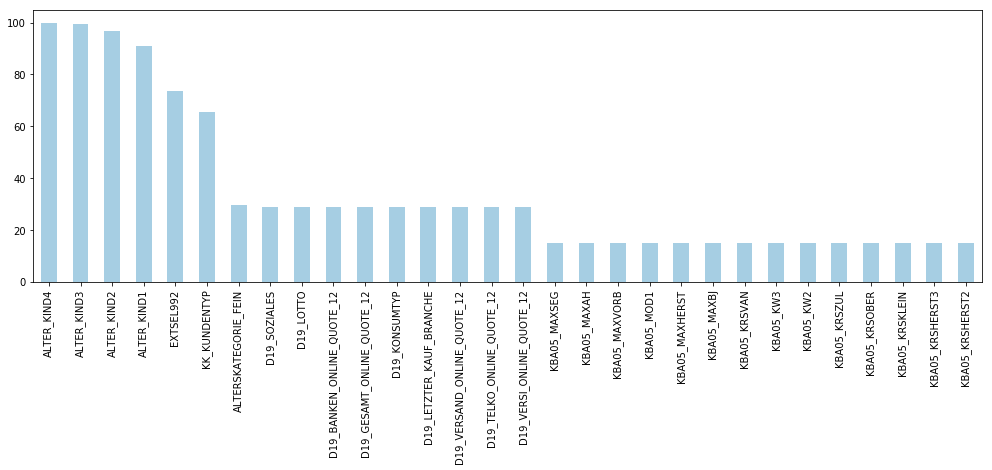

In [10]:
azdias_missing['% of Total Values'].head(30).plot(kind ='bar', figsize=(17,5),colormap='Paired')

It appears that there are some feature with missing values, but according to *DIAS Attributes-Values 2017_modify.xlsx*

it could be worse than expected, some features are represented with -1 or 0 when the data is missing or unkonw. 

Using the *DIAS Attributes-Values 2017.xlsx* file we can use it to complete missing data and replace it with proper values used in the file. Based on this file, I created the dias_unkown.csv file (For the Creation of the file please refer to the data [data_script.py](files/data_cript.py).  This file can be used to understand wich value correspond to a unknown o missing data.

In [11]:
dias = pd.read_csv('files/dias_unknown.csv',sep=';')

In [12]:
dias.head(10)

,Attribute,Meaning,Value,Unknown_0,Unknown_1
0,AGER_TYP,unknown,-1,NaN,NaN
1,ALTERSKATEGORIE_GROB,unknown,"-1, 0",-1.0,0.0
2,ALTER_HH,unknown / no main age detectable,0,NaN,NaN
3,ANREDE_KZ,unknown,"-1, 0",-1.0,0.0
4,BALLRAUM,unknown,-1,NaN,NaN
5,BIP_FLAG,unknown,-1,NaN,NaN
6,CAMEO_DEUG_2015,unknown,-1,NaN,NaN
7,CAMEO_DEUINTL_2015,unknown,-1,NaN,NaN
8,CJT_GESAMTTYP,unknown,0,NaN,NaN
9,D19_BANKEN_ANZ_12,no transactions known,0,NaN,NaN


In [13]:
values_to_replace=dias.set_index('Attribute').to_dict()['Value']

Since there are some features that has 2 possible options when the value is unknown, I created the following function that will replace those value according to the dias_unknown.csv, first It will evaluated if a feature has 2 possible options when the value is unknown and will unified them for the first value that appears in the Value columns,  then it will replace missing values with **NaN**

In [14]:
from os import path

This takes some time, it will be usefull to save the dataset

In [15]:
%%time
if path.exists("data/azdias_with_nan.csv")==False:
    print('Creating File : azdias_with_nan.csv')
    for col in azdias.columns:
        if col in dias.Attribute.unique():
            if(len(values_to_replace[col].split(','))>1):
                azdias.loc[azdias[col]==int(values_to_replace[col].split(',')[1]), col] = int(values_to_replace[col].split(',')[0])
                azdias.loc[azdias[col]==int(values_to_replace[col].split(',')[0]), col] = np.nan
            else:
                azdias.loc[azdias[col]==int(values_to_replace[col]), col] = np.nan  
    azdias.to_csv('data/azdias_with_nan.csv',index=False,sep=';')
else:
    print('File Exist!, Dont Worry, opening : azdias_with_nan.csv')
    azdias=pd.read_csv('data/azdias_with_nan.csv',sep=';')

File Exist!, Dont Worry, opening : azdias_with_nan.csv
Wall time: 20.8 s


In [16]:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LETZTER_KAUF_BRANCHE,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,EWDICHTE,EXTSEL992,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,

In [17]:
azdias_missing=missing_values_table(azdias)

Dataframe has 366 columns. 
334 has missing values


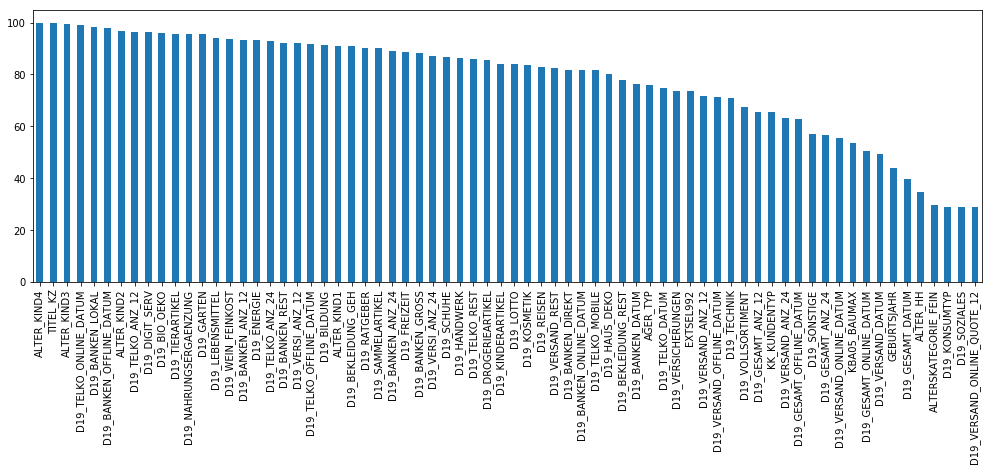

In [18]:
azdias_missing['% of Total Values'].head(70).plot(kind ='bar', figsize=(17,5))

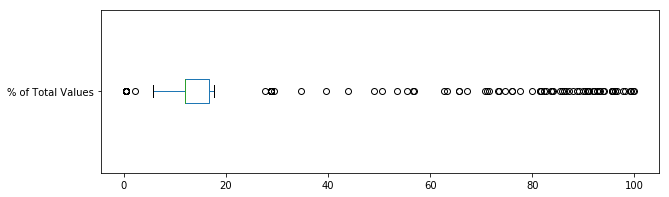

In [19]:
azdias_missing['% of Total Values'].plot(kind ='box', figsize=(10,3),vert=False)

Still there are features with a lot of missing values. I set a Threshold of 30 % since I could be leading to a duplicated to much information that it becomes noise.

In [20]:
missing_columns_to_drop=azdias_missing[azdias_missing['% of Total Values']>=30].index
missing_columns_to_drop

Index(['ALTER_KIND4', 'TITEL_KZ', 'ALTER_KIND3', 'D19_TELKO_ONLINE_DATUM', 'D19_BANKEN_LOKAL', 'D19_BANKEN_OFFLINE_DATUM', 'ALTER_KIND2', 'D19_TELKO_ANZ_12', 'D19_DIGIT_SERV', 'D19_BIO_OEKO', 'D19_TIERARTIKEL', 'D19_NAHRUNGSERGAENZUNG', 'D19_GARTEN', 'D19_LEBENSMITTEL', 'D19_WEIN_FEINKOST', 'D19_BANKEN_ANZ_12', 'D19_ENERGIE', 'D19_TELKO_ANZ_24', 'D19_BANKEN_REST', 'D19_VERSI_ANZ_12', 'D19_TELKO_OFFLINE_DATUM', 'D19_BILDUNG', 'ALTER_KIND1', 'D19_BEKLEIDUNG_GEH', 'D19_RATGEBER', 'D19_SAMMELARTIKEL', 'D19_BANKEN_ANZ_24', 'D19_FREIZEIT', 'D19_BANKEN_GROSS', 'D19_VERSI_ANZ_24', 'D19_SCHUHE', 'D19_HANDWERK', 'D19_TELKO_REST', 'D19_DROGERIEARTIKEL', 'D19_KINDERARTIKEL', 'D19_LOTTO', 'D19_KOSMETIK', 'D19_REISEN', 'D19_VERSAND_REST', 'D19_BANKEN_DIREKT', 'D19_BANKEN_ONLINE_DATUM', 'D19_TELKO_MOBILE', 'D19_HAUS_DEKO', 'D19_BEKLEIDUNG_REST', 'D19_BANKEN_DATUM', 'AGER_TYP', 'D19_TELKO_DATUM', 'D19_VERSICHERUNGEN', 'EXTSEL992', 'D19_VERSAND_ANZ_12', 'D19_VERSAND_OFFLINE_DATUM', 'D19_TECHNIK',
     

In [21]:
azdias.drop(missing_columns_to_drop,axis=1,inplace=True)

In [22]:
azdias_missing_2=missing_values_table(azdias)

Dataframe has 300 columns. 
268 has missing values


## Rows with Missing data

Lets Check percentage of missing values pair row

In [23]:
clients_missing_data=(azdias.isnull().sum(axis=1)*100)/azdias.shape[1]

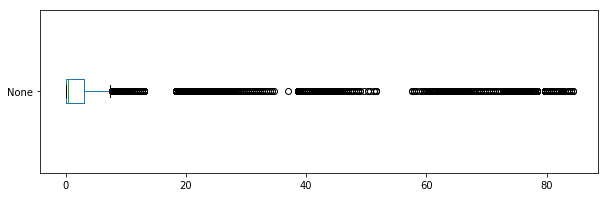

In [24]:
clients_missing_data.plot(kind='box', figsize=(10,3),vert=False)

There are a lot of clients that are missing a lot of information, those clients might be not worth saving, since the final output will be a client with almost every feature fill with the mean, median or mode of the corresponding feature.

In [25]:
sum(clients_missing_data>25)

107950

Thankfully we have a lot of clients, if we set a threshold of 25 % of missing data, we can see that if we drop them we will loose only 12 % of the full dataset.. Yes, thats not ideal but it is prefered to work with real data, than with a lot of impute information

In [26]:
azdias.shape

(891221, 300)

In [27]:
azdias.dropna(thresh=250,inplace=True)

In [28]:
azdias.shape

(737288, 300)

## Cleaning and Preprocessing

An strategy to deal with the rest of features with **NaN**  will be imputation with median or most frequent value. Statistcally this doesnt affect the feautre distribution. This is way much butter than dropping points as also it gives more accurate results than dropping data points or columns entirely.

 * Numerical data will be imputed with median value in the column to deal with outliers.
 
 * Categorial data will be imputed with  the most frequent value. 

In [29]:
azdias_columns_impute = azdias_missing_2.index

 I create a file name *data_types.csv* manually, checking each feature with the DIALES Files to determine if a columns was numeric, categorical , or datetime. I add a column to express if the categorical feature can be represented in an ordinal way or needs to be represented in one hot encoding. Aditionaly I created an Anotations columns where I wrote some notes regarding to the preprocess. Maybe this can be enconde in python Rules but, it is safer to check every column manually one by one. 

In [30]:
azdias_dtypes = pd.read_csv('files/data_types.csv',sep=',')

In [31]:
azdias_dtypes.head()

,Attribute,Feature_Type,Type,Anotations
0,AGER_TYP,Category,OHE,NaN
1,AKT_DAT_KL,Category,Ordinal,NaN
2,ALTER_HH,datetime,NaN,Re Encode
3,ALTERSKATEGORIE_FEIN,Category,Ordinal,NaN
4,ALTERSKATEGORIE_GROB,Category,Ordinal,NaN


In [32]:
azdias_dtypes[~azdias_dtypes.Anotations.isnull()]

,Attribute,Feature_Type,Type,Anotations
2,ALTER_HH,datetime,NaN,Re Encode
16,CAMEO_DEUG_2015,Category,Ordinal,Replace Value X
17,CAMEO_DEUINTL_2015,Category,OHE,Mixed Features
18,CAMEO_INTL_2015,Category,Ordinal,Replace Value X
62,D19_LETZTER_KAUF_BRANCHE,Category,OHE,REMOVE
307,LNR,Category,NaN,ID -> REMOVE
308,LP_FAMILIE_FEIN,Category,OHE,CHECK
309,LP_FAMILIE_GROB,Category,OHE,CHECK
310,LP_LEBENSPHASE_FEIN,Category,OHE,Mixed Features
311,LP_LEBENSPHASE_GROB,Category,OHE,Mixed Features


ALTER_HH and TITEL_KZ were droped due to much missing information

D19_LETZTER_KAUF_BRANCHE means : *LAST PURCHASE INDUSTRY*, This features has many cagetogies this could be difficult to use with a OneHotEncoding, Besides, from a business perspective, I dont think that this feature should be include in a segmentation project, this can be a miss leading feature. 

In [33]:
azdias.drop(['D19_LETZTER_KAUF_BRANCHE'],axis=1,inplace=True)

### XX values

In [34]:
azdias['CAMEO_INTL_2015']=azdias['CAMEO_INTL_2015'].replace('XX',np.nan)
azdias['CAMEO_INTL_2015']=azdias['CAMEO_INTL_2015'].astype('float')

azdias['CAMEO_DEUG_2015']=azdias['CAMEO_DEUG_2015'].replace('X',np.nan)
azdias['CAMEO_DEUG_2015']=azdias['CAMEO_DEUG_2015'].astype('float')

azdias['CAMEO_DEU_2015']=azdias['CAMEO_DEU_2015'].replace('X',np.nan)
azdias['CAMEO_DEU_2015']=azdias['CAMEO_DEU_2015'].replace('XX',np.nan)

### DateTime

In [35]:
azdias_dtypes[azdias_dtypes.Feature_Type=='datetime']

,Attribute,Feature_Type,Type,Anotations
2,ALTER_HH,datetime,NaN,Re Encode
98,EINGEFUEGT_AM,datetime,NaN,NaN
99,EINGEZOGENAM_HH_JAHR,datetime,NaN,NaN


In [36]:
# EINGEFUEGT-> Insertion
azdias['EINGEFUEGT_AM']=pd.to_datetime(azdias['EINGEFUEGT_AM'])
# EINGEZOGENAM_HH_JAHR - > INCORPORATED HH YEAR
azdias['EINGEZOGENAM_HH_JAHR']=pd.to_datetime(azdias['EINGEZOGENAM_HH_JAHR'].astype('int'),format='%Y')

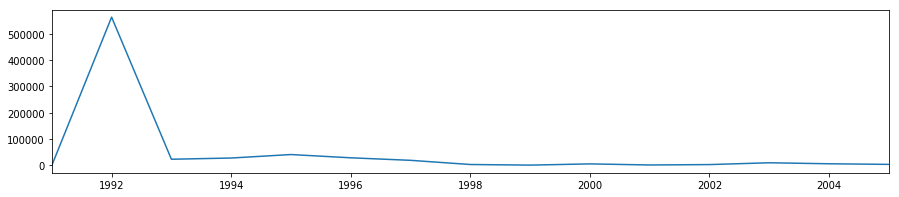

In [37]:
azdias['EINGEFUEGT_AM'].dt.year.value_counts().sort_index().plot(kind='line',figsize=(15,3));

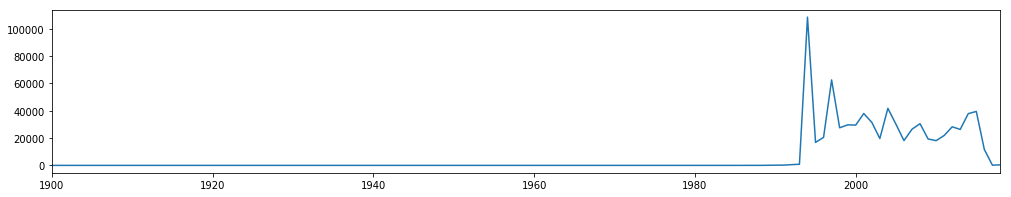

In [38]:
azdias['EINGEZOGENAM_HH_JAHR'].dt.year.value_counts().sort_index().plot(kind='line',figsize=(17,3))

Both datetime feature don't represent anything important, they can be safely dropped

In [39]:
azdias.drop('EINGEZOGENAM_HH_JAHR',axis=1,inplace=True)
azdias.drop('EINGEFUEGT_AM',axis=1,inplace=True)

### Correlations

In [40]:
corr_matrix = azdias.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [41]:
(upper>=0.9).sum().sort_values(ascending=False).head(20)

LP_LEBENSPHASE_GROB            3
LP_LEBENSPHASE_FEIN            2
PLZ8_GBZ                       1
PLZ8_ANTG1                     1
PLZ8_ANTG3                     1
ORTSGR_KLS9                    1
PLZ8_BAUMAX                    1
PLZ8_HHZ                       1
LP_STATUS_GROB                 1
KBA13_HERST_SONST              1
LP_FAMILIE_GROB                1
D19_VERSAND_ONLINE_QUOTE_12    1
KBA13_HALTER_66                1
KBA13_KMH_250                  1
CAMEO_INTL_2015                1
ANZ_STATISTISCHE_HAUSHALTE     1
KBA05_KW3                      0
KBA05_KRSVAN                   0
KBA05_KRSAQUOT                 0
KBA05_KRSHERST1                0
dtype: int64

In [42]:
upper['LP_LEBENSPHASE_GROB'].sort_values(ascending=False).head()

LP_LEBENSPHASE_FEIN    0.989258
LP_FAMILIE_GROB        0.954524
LP_FAMILIE_FEIN        0.941326
ANZ_PERSONEN           0.768412
D19_KONSUMTYP_MAX      0.376616
Name: LP_LEBENSPHASE_GROB, dtype: float64

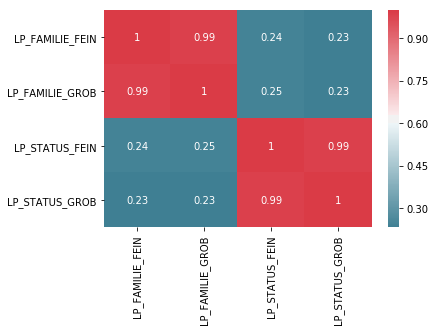

In [43]:
sns.heatmap(azdias[['LP_FAMILIE_FEIN','LP_FAMILIE_GROB','LP_STATUS_FEIN','LP_STATUS_GROB']].corr(),
            annot=True,cmap=sns.diverging_palette(220, 10, as_cmap=True))

LP_FAMILIE_FEIN and LP_FAMILIE_GROB are highly correlated, and LP_STATUS_FEIN and LP_STATUS_GROB are also highly correlated... Based on the graph above and the descriptions found in the DIAS File... I decide to drop those columns

In [44]:
azdias.drop(['LP_FAMILIE_FEIN','LP_FAMILIE_GROB'],axis=1,inplace=True)

Based on the description file I can reencode LP_STATUS_GROB

In [45]:
# Social_Status 1,2: low-income earners | 3,4,5: average earners | 6,7: independants | 8,9: houseowners | 10: top earners 
azdias.replace({'LP_STATUS_GROB' :  { 2 : 1,
                                      4 : 3,
                                      5 : 3,
                                      7 : 6,
                                      9 : 8,}}, inplace =True)

KBA13_GBZ           0.980339
KBA13_ANZAHL_PKW    0.724324
KBA13_BAUMAX        0.625953
PLZ8_BAUMAX         0.623083
KBA13_ANTG4         0.579736
Name: PLZ8_GBZ, dtype: float64


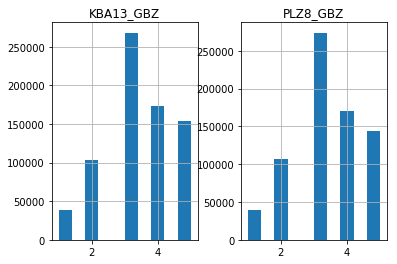

In [46]:
print(upper['PLZ8_GBZ'].sort_values(ascending=False).head())
azdias[['PLZ8_GBZ','KBA13_GBZ']].hist();

In [47]:
upper['PLZ8_ANTG1'].sort_values(ascending=False).head()

KBA13_ANTG1     0.919985
KBA13_ANTG3     0.786214
KBA13_BAUMAX    0.744431
KBA13_ANTG4     0.729143
MOBI_REGIO      0.606817
Name: PLZ8_ANTG1, dtype: float64

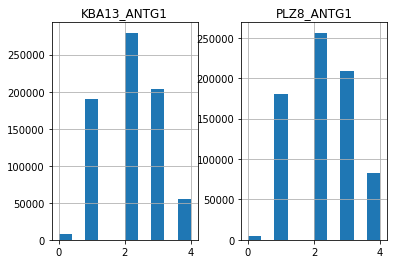

In [48]:
azdias[['PLZ8_ANTG1','KBA13_ANTG1']].hist();

KBA13_ANTG3     0.911542
PLZ8_ANTG1      0.801002
KBA13_ANTG1     0.793597
KBA13_ANTG4     0.740722
KBA13_BAUMAX    0.697319
Name: PLZ8_ANTG3, dtype: float64


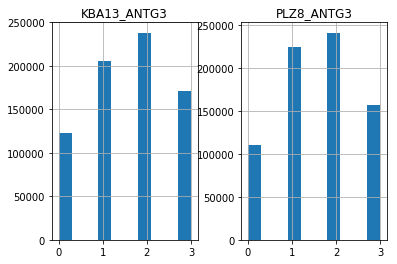

In [49]:
print(upper['PLZ8_ANTG3'].sort_values(ascending=False).head())
azdias[['PLZ8_ANTG3','KBA13_ANTG3']].hist();

KBA13_KMH_211        0.960261
KBA13_KMH_140_210    0.704099
KBA13_CCM_2501       0.549784
KBA13_CCM_3000       0.515198
KBA13_KMH_180        0.464340
Name: KBA13_KMH_250, dtype: float64


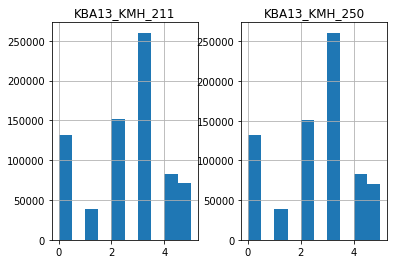

In [50]:
print(upper['KBA13_KMH_250'].sort_values(ascending=False).head())
azdias[['KBA13_KMH_250','KBA13_KMH_211']].hist();

KBA13_BAUMAX    0.950245
PLZ8_ANTG4      0.758855
KBA13_ANTG4     0.754630
PLZ8_ANTG1      0.735336
KBA13_ANTG1     0.726594
Name: PLZ8_BAUMAX, dtype: float64


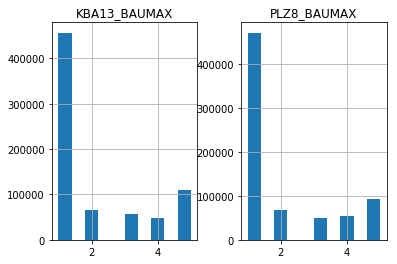

In [51]:
print(upper['PLZ8_BAUMAX'].sort_values(ascending=False).head())
azdias[['PLZ8_BAUMAX','KBA13_BAUMAX']].hist();

KBA13_HHZ           0.969420
KBA13_ANZAHL_PKW    0.719870
PLZ8_GBZ            0.497285
KBA13_GBZ           0.489132
KBA13_CCM_3001      0.303061
Name: PLZ8_HHZ, dtype: float64


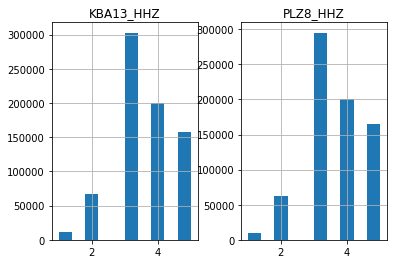

In [52]:
print(upper['PLZ8_HHZ'].sort_values(ascending=False).head())
azdias[['PLZ8_HHZ','KBA13_HHZ']].hist();

KBA13_FAB_SONSTIGE       1.000000
LNR                      0.319329
ARBEIT                   0.263810
KBA13_HERST_FORD_OPEL    0.258874
KBA13_HERST_BMW_BENZ     0.257494
Name: KBA13_HERST_SONST, dtype: float64


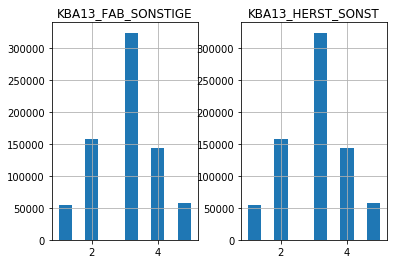

In [53]:
print(upper['KBA13_HERST_SONST'].sort_values(ascending=False).head())
azdias[['KBA13_HERST_SONST','KBA13_FAB_SONSTIGE']].hist();

D19_GESAMT_ONLINE_QUOTE_12    0.914624
D19_KONSUMTYP                 0.573617
D19_KONSUMTYP_MAX             0.512071
CJT_KATALOGNUTZER             0.321368
ANZ_PERSONEN                  0.241999
Name: D19_VERSAND_ONLINE_QUOTE_12, dtype: float64


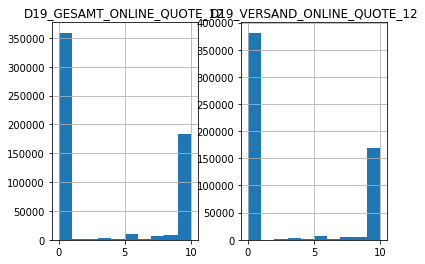

In [54]:
print(upper['D19_VERSAND_ONLINE_QUOTE_12'].sort_values(ascending=False).head())
azdias[['D19_VERSAND_ONLINE_QUOTE_12','D19_GESAMT_ONLINE_QUOTE_12']].hist();

KBA13_ALTERHALTER_61    0.927607
KBA13_ALTERHALTER_45    0.528862
KBA13_HALTER_65         0.509646
KBA13_HALTER_40         0.451225
KBA13_HALTER_50         0.443195
Name: KBA13_HALTER_66, dtype: float64


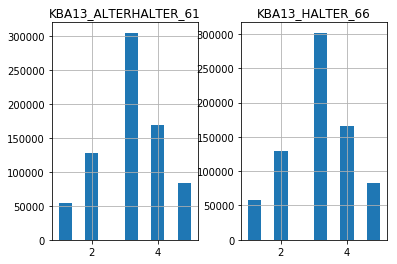

In [55]:
print(upper['KBA13_HALTER_66'].sort_values(ascending=False).head())
azdias[['KBA13_HALTER_66','KBA13_ALTERHALTER_61']].hist();

ANZ_HAUSHALTE_AKTIV    0.981818
ANZ_HH_TITEL           0.400354
ANZ_PERSONEN           0.118916
AKT_DAT_KL             0.107763
LNR                    0.060199
Name: ANZ_STATISTISCHE_HAUSHALTE, dtype: float64


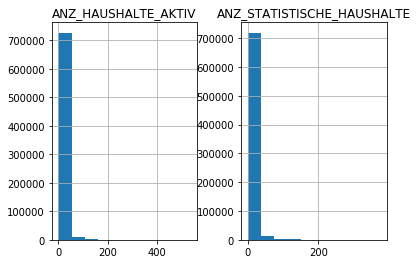

In [56]:
print(upper['ANZ_STATISTISCHE_HAUSHALTE'].sort_values(ascending=False).head())
azdias[['ANZ_STATISTISCHE_HAUSHALTE','ANZ_HAUSHALTE_AKTIV']].hist();

In [57]:
azdias.drop(['KBA13_GBZ','KBA13_ANTG1','KBA13_ANTG3',
             'KBA13_KMH_250','KBA13_BAUMAX','KBA13_HHZ','KBA13_FAB_SONSTIGE',
            'D19_VERSAND_ONLINE_QUOTE_12','KBA13_HALTER_66','ANZ_STATISTISCHE_HAUSHALTE'],axis=1,inplace=True)

### Engineer Mixed-Type Features


                PRAEGENDE_JUGENDJAHRE                                CAMEO_INTL_2015

| Value 	|                              Meaning                             	| Value 	|                           Meaning                          	|
|:-----:	|:----------------------------------------------------------------:	|:-----:	|:----------------------------------------------------------:	|
|   -1  	|                              unknown                             	|   -1  	|                           unknown                          	|
|   1   	|                40ies - war years (Mainstream, O+W)               	|   11  	|       Wealthy Households-Pre-Family Couples & Singles      	|
|   2   	|          40ies - reconstruction years (Avantgarde, O+W)          	|   12  	|       Wealthy Households-Young Couples With Children       	|
|   3   	|            50ies - economic miracle (Mainstream, O+W)            	|   13  	|    Wealthy Households-Families With School Age Children    	|
|   4   	|      50ies - milk bar / Individualisation (Avantgarde, O+W)      	|   14  	|    Wealthy Households-Older Families &    Mature Couples   	|
|   5   	|            60ies - economic miracle (Mainstream, O+W)            	|   15  	|           Wealthy Households-Elders In Retirement          	|
|   6   	|    60ies - generation 68 / student protestors (Avantgarde, W)    	|   21  	|     Prosperous Households-Pre-Family Couples & Singles     	|
|   7   	|   60ies - opponents to the building of the Wall (Avantgarde, O)  	|   22  	|      Prosperous Households-Young Couples With Children     	|
|   8   	|           70ies - family orientation (Mainstream, O+W)           	|   23  	|   Prosperous Households-Families With School Age Children  	|
|   9   	|             70ies - peace movement (Avantgarde, O+W)             	|   24  	|    Prosperous Households-Older Families & Mature Couples   	|
|   10  	|              80ies - Generation Golf (Mainstream, W)             	|   25  	|         Prosperous Households-Elders In Retirement         	|
|   11  	|           80ies - ecological awareness (Avantgarde, W)           	|   31  	|     Comfortable Households-Pre-Family Couples & Singles    	|
|   12  	| 80ies - FDJ / communist party youth organisation (Mainstream, O) 	|   32  	|     Comfortable Households-Young Couples With Children     	|
|   13  	|         80ies - Swords into ploughshares (Avantgarde, O)         	|   33  	|  Comfortable Households-Families With School Age Children  	|
|   14  	|           90ies - digital media kids (Mainstream, O+W)           	|   34  	|   Comfortable Households-Older Families & Mature Couples   	|
|   15  	|          90ies - ecological awareness (Avantgarde, O+W)          	|   35  	|         Comfortable Households-Elders In Retirement        	|
|       	|                                                                  	|   41  	|    Less Affluent Households-Pre-Family Couples & Singles   	|
|       	|                                                                  	|   42  	|    Less Affluent Households-Young Couples With Children    	|
|       	|                                                                  	|   43  	| Less Affluent Households-Families With School Age Children 	|
|       	|                                                                  	|   44  	|  Less Affluent Households-Older Families & Mature Couples  	|
|       	|                                                                  	|   45  	|        Less Affluent Households-Elders In Retirement       	|
|       	|                                                                  	|   51  	|       Poorer Households-Pre-Family Couples & Singles       	|
|       	|                                                                  	|   52  	|        Poorer Households-Young Couples With Children       	|
|       	|                                                                  	|   53  	|     Poorer Households-Families With School Age Children    	|
|       	|                                                                  	|   54  	|      Poorer Households-Older Families & Mature Couples     	|
|       	|                                                                  	|   55  	|           Poorer Households-Elders In Retirement           	|

In [58]:
mixed = pd.read_excel('files/mixed_features.xlsx')

In [59]:
PRAEGENDE_JUGENDJAHRE=mixed[mixed['Attribute']=='PRAEGENDE_JUGENDJAHRE']

In [60]:
PRAEGENDE_JUGENDJAHRE['GENERATION_DECADE']=PRAEGENDE_JUGENDJAHRE['Meaning'].apply(lambda x:x.split('-')[0])
PRAEGENDE_JUGENDJAHRE['Type']=PRAEGENDE_JUGENDJAHRE['Meaning'].apply(lambda x:x.split('-')[1].split('(')[0].split('(')[0])
PRAEGENDE_JUGENDJAHRE['MOVEMENT']=PRAEGENDE_JUGENDJAHRE['Meaning'].str.extract(pat = '(\(\w*,)')
PRAEGENDE_JUGENDJAHRE['MOVEMENT']=PRAEGENDE_JUGENDJAHRE['MOVEMENT'].str.strip('(,')
PRAEGENDE_JUGENDJAHRE['SECTOR']=PRAEGENDE_JUGENDJAHRE['Meaning'].apply(lambda x:x.split(',')[1])
PRAEGENDE_JUGENDJAHRE['SECTOR']=PRAEGENDE_JUGENDJAHRE['SECTOR'].str.strip(')')

In [61]:
PRAEGENDE_JUGENDJAHRE.drop(['Attribute'],axis=1,inplace=True)

In [62]:
PRAEGENDE_JUGENDJAHRE

,Value,Meaning,GENERATION_DECADE,Type,MOVEMENT,SECTOR
0,1,"40ies - war years (Mainstream, O+W)",40ies,war years,Mainstream,O+W
1,2,"40ies - reconstruction years (Avantgarde, O+W)",40ies,reconstruction years,Avantgarde,O+W
2,3,"50ies - economic miracle (Mainstream, O+W)",50ies,economic miracle,Mainstream,O+W
3,4,50ies - milk bar / Individualisation (Avantgar...,50ies,milk bar / Individualisation,Avantgarde,O+W
4,5,"60ies - economic miracle (Mainstream, O+W)",60ies,economic miracle,Mainstream,O+W
5,6,60ies - generation 68 / student protestors (Av...,60ies,generation 68 / student protestors,Avantgarde,W
6,7,60ies - opponents to the building of the Wall ...,60ies,opponents to the building of the Wall,Avantgarde,O
7,8,"70ies - family orientation (Mainstream, O+W)",70ies,family orientation,Mainstream,O+W
8,9,"70ies - peace movement (Avantgarde, O+W)",70ies,peace movement,Avantgarde,O+W
9,10,"80ies - Generation Golf (Mainstream, W)",80ies,Generation Golf,Mainstream,W


In [63]:
CAMEO_INTL_2015=mixed[mixed['Attribute']=='CAMEO_INTL_2015']

In [64]:
CAMEO_INTL_2015=pd.concat([CAMEO_INTL_2015,CAMEO_INTL_2015['Meaning'].str.split('-',n=1,expand=True)],axis=1)

In [65]:
CAMEO_INTL_2015.drop(['Attribute','Meaning'],axis=1,inplace=True)

In [66]:
CAMEO_INTL_2015.columns = ['Value','Wealth','LifeStage']

In [67]:
CAMEO_INTL_2015

,Value,Wealth,LifeStage
15,11,Wealthy Households,Pre-Family Couples & Singles
16,12,Wealthy Households,Young Couples With Children
17,13,Wealthy Households,Families With School Age Children
18,14,Wealthy Households,Older Families & Mature Couples
19,15,Wealthy Households,Elders In Retirement
20,21,Prosperous Households,Pre-Family Couples & Singles
21,22,Prosperous Households,Young Couples With Children
22,23,Prosperous Households,Families With School Age Children
23,24,Prosperous Households,Older Families & Mature Couples
24,25,Prosperous Households,Elders In Retirement


LP_LEBENSPHASE_FEIN and LP_LEBENSPHASE_GROB, both of them describe the life stage of a person which shares similar traits to CAMEO_INTL_2015, I dropped the two attributes here.

In [68]:
azdias.drop(['LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB'],axis=1,inplace=True)

### Distributions

#### Numeric

In [69]:
numeric_features=azdias_dtypes[azdias_dtypes['Feature_Type']=='Numeric ']['Attribute'].tolist()

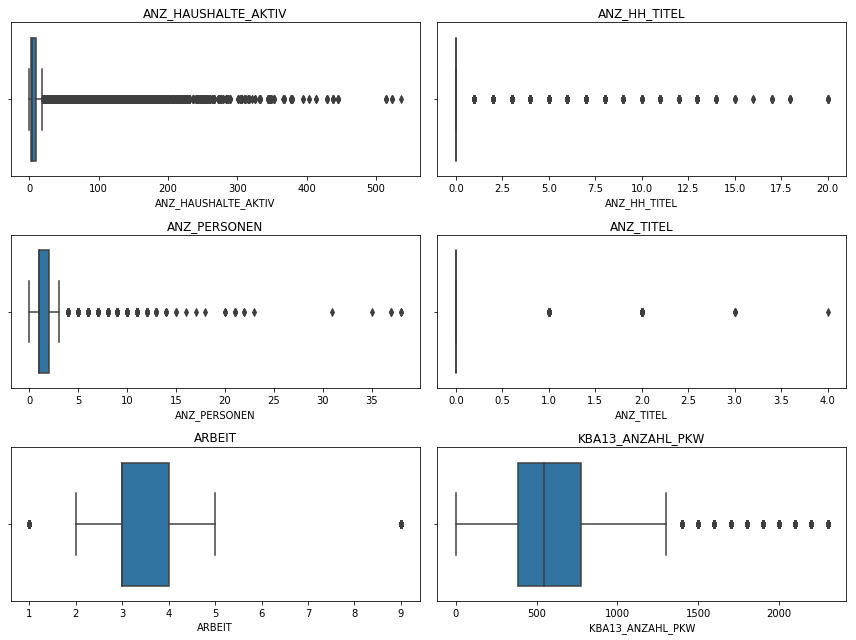

In [70]:
numeric = list(filter(lambda x:x in azdias.columns.tolist(),numeric_features))
nr_cols = 2
nr_rows = len(numeric)//nr_cols
li_cat_feats = numeric
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*6,nr_rows*3))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], data=azdias, ax = axs[r][c]).set_title(li_cat_feats[i])
plt.tight_layout()
plt.show()

In [71]:
azdias.drop(['ANZ_TITEL'],axis=1,inplace=True)

#### Categorical

In [72]:
columns_OHE=azdias_dtypes[azdias_dtypes.Type=='OHE']['Attribute'].tolist()+['GENERATION_DECADE',
                                                                            'Type', 'MOVEMENT','Wealth',
                                                                            'LifeStage']

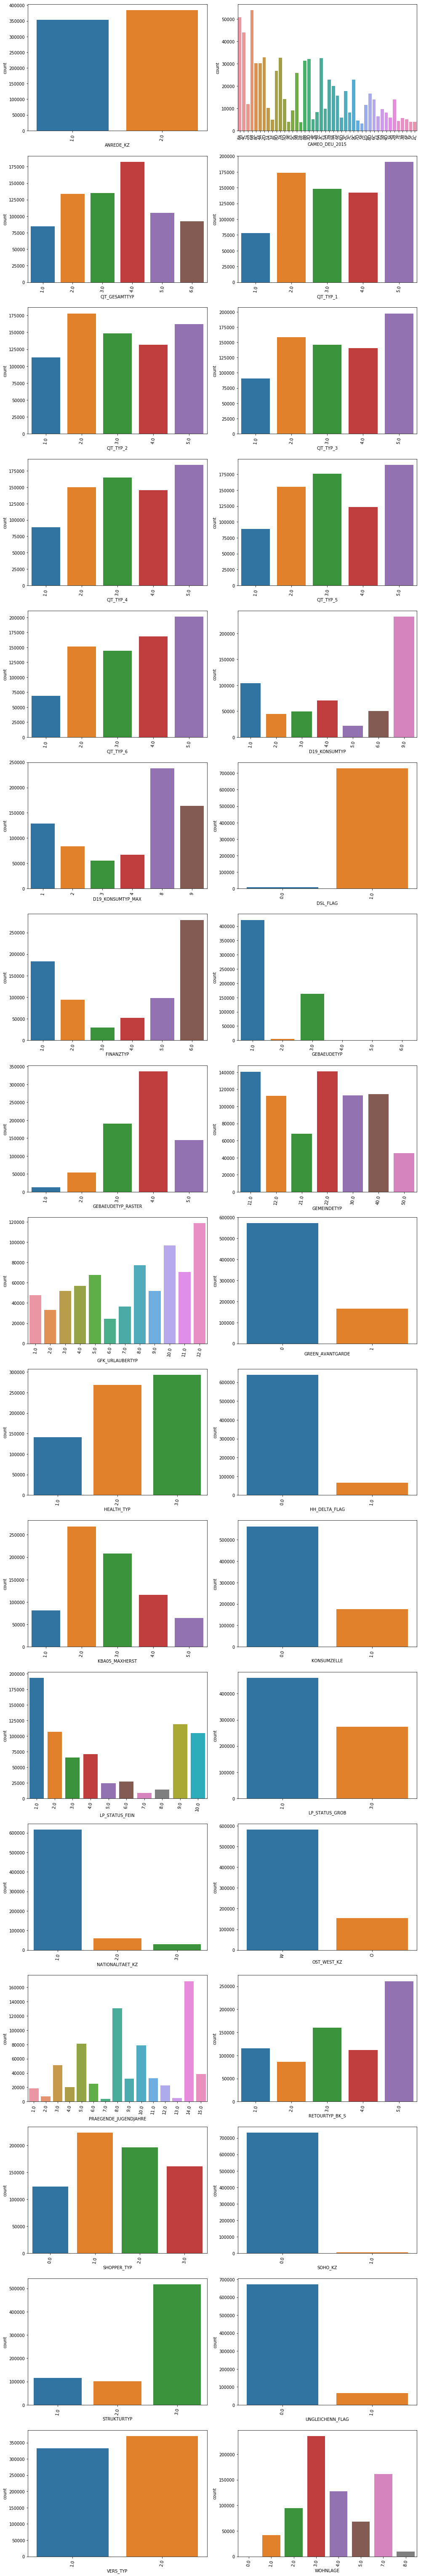

In [73]:
categories = list(filter(lambda x:x in azdias.columns.tolist(),columns_OHE))
nr_cols = 2
nr_rows = len(categories)//nr_cols
li_cat_feats = categories
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*7,nr_rows*5))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.countplot(x=li_cat_feats[i], data=azdias, ax = axs[r][c])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [74]:
for col in columns_OHE:
    if col in azdias.columns:
        print(col,'-------------',azdias[col].nunique())
        print(azdias[col].value_counts(normalize=True))
        print('-------------')

ANREDE_KZ ------------- 2
2.0    0.521207
1.0    0.478793
Name: ANREDE_KZ, dtype: float64
-------------
CAMEO_DEU_2015 ------------- 44
6B    0.073583
8A    0.069182
4C    0.059933
2D    0.044834
7A    0.044458
3C    0.044370
3D    0.043840
8B    0.042594
4A    0.041221
8C    0.041075
9D    0.036441
9B    0.035272
7B    0.031230
9C    0.031227
9A    0.027328
2C    0.024173
8D    0.022720
6E    0.021252
5D    0.019172
2B    0.019132
6C    0.018895
2A    0.016242
1D    0.015610
1A    0.013852
5A    0.013245
5B    0.013204
5C    0.012331
4B    0.011287
7C    0.011073
4D    0.010969
6A    0.008742
3A    0.007999
6D    0.007843
3B    0.007778
6F    0.006878
4E    0.006819
1E    0.006517
7D    0.006037
7E    0.005961
1C    0.005466
5F    0.005367
9E    0.005233
1B    0.005198
5E    0.004416
Name: CAMEO_DEU_2015, dtype: float64
-------------
CJT_GESAMTTYP ------------- 6
4.0    0.248724
3.0    0.184407
2.0    0.182505
5.0    0.143063
6.0    0.125666
1.0    0.115636
Name: CJT_GESAMTTYP, dtype:

Based on the aborve graph we can see that some features present low variance 99%->1%

'SOHO_KZ','DSL_FLAG'

In [75]:
azdias.drop(['SOHO_KZ','DSL_FLAG'],axis=1,inplace=True)

### IMPUTE

In [76]:
azdias_dtypes.Feature_Type.value_counts()

Category    357
Numeric       9
datetime      3
Name: Feature_Type, dtype: int64

In [77]:
azdias_dtypes.groupby(['Feature_Type','Type'])['Type'].count()

Feature_Type  Type   
Category      OHE         46
              Ordinal    310
Name: Type, dtype: int64

In [78]:
azdias_dtypes[azdias_dtypes.Attribute.isin(azdias_columns_impute)].Feature_Type.value_counts()

Category    258
Numeric       8
datetime      2
Name: Feature_Type, dtype: int64

In [79]:
azdias_dtypes[azdias_dtypes.Feature_Type=='Numeric ']

,Attribute,Feature_Type,Type,Anotations
6,ANZ_HAUSHALTE_AKTIV,Numeric,NaN,NaN
7,ANZ_HH_TITEL,Numeric,NaN,NaN
9,ANZ_PERSONEN,Numeric,NaN,NaN
10,ANZ_STATISTISCHE_HAUSHALTE,Numeric,NaN,NaN
11,ANZ_TITEL,Numeric,NaN,NaN
12,ARBEIT,Numeric,NaN,NaN
111,GEBURTSJAHR,Numeric,NaN,NaN
194,KBA13_ANZAHL_PKW,Numeric,NaN,NaN
314,MIN_GEBAEUDEJAHR,Numeric,NaN,NaN


In [80]:
columns_numeric = azdias_dtypes[azdias_dtypes.Feature_Type=='Numeric ']['Attribute'].tolist()
columns_categorical = azdias_dtypes[azdias_dtypes.Feature_Type=='Category']['Attribute'].tolist()

In [81]:
values_numeric = {}
for col in columns_numeric:
    if col in azdias.columns:
        values_numeric[col] = azdias[col].median()

In [82]:
values_mode = {}
for col in columns_categorical:
    if col in azdias.columns:
        values_mode[col] = azdias[col].mode()[0]

In [83]:
azdias.fillna(value=values_numeric,inplace=True)
azdias.fillna(value=values_mode,inplace=True)

In [84]:
missing_values_table(azdias)

Dataframe has 280 columns. 
0 has missing values


,Missing,% of Total Values


In [85]:
azdias=pd.merge(azdias,PRAEGENDE_JUGENDJAHRE[['Value','GENERATION_DECADE', 'Type', 'MOVEMENT']],
        left_on='PRAEGENDE_JUGENDJAHRE', right_on='Value',how='left')
azdias.drop('PRAEGENDE_JUGENDJAHRE',axis=1,inplace=True)
if 'Value' in azdias.columns:azdias.drop(['Value'],axis=1,inplace=True)

In [86]:
azdias=pd.merge(azdias,CAMEO_INTL_2015[['Value','Wealth', 'LifeStage',]],
        left_on='CAMEO_INTL_2015', right_on='Value',how='left')
azdias.drop('CAMEO_INTL_2015',axis=1,inplace=True)
if 'Value' in azdias.columns:azdias.drop(['Value'],axis=1,inplace=True)

In [87]:
azdias.shape

(737288, 283)

### ID

In [88]:
azdias['LNR'].nunique() # THIS IS THE ID

737288

In [89]:
azdias.set_index('LNR',inplace=True)

In [90]:
azdias.head()

,AKT_DAT_KL,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ONLINE_QUOTE_12,D19_BUCH_CD,D19_GESAMT_ONLINE_QUOTE_12,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_SOZIALES,D19_TELKO_ONLINE_QUOTE_12,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG2,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FIAT,KBA13_FORD,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SPORTWAGEN,KBA13_SEG_UTILITIES,KBA13_SEG_VAN,KBA13_SEG_WOHNMOBILE,KBA13_SITZE_4,KBA13_SITZE_5,KBA13_SITZE_6,KBA13_TOYOTA,KBA13_VORB_0,KBA13_VORB_1,KBA13_VORB_1_2,KBA13_VORB_2,KBA13_VORB_3,KBA13_VW,KKK,KOMBIALTER,KONSUMNAEHE,KONSUMZELLE,LP_STATUS_FEIN,LP_STATUS_GROB,MIN_GEBAEUDEJAHR,MOBI_RASTER,MOBI_REGIO,NATIONALITAET_KZ,ONLINE_AFFINITAET,ORTSGR_KLS9,OST_WEST_KZ,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_GBZ,PLZ8_HHZ,REGIOTYP,RELAT_AB,RETOURTYP_BK_S,RT_KEIN_ANREIZ,RT_SCHNAEPPCHEN,RT_UEBERGROESSE,SEMIO_DOM,SEMIO_ERL,SEMIO_FAM,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT,SEMIO_RAT,SEMIO_REL,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,STRUKTURTYP,UMFELD_ALT,UMFELD_JUNG,UNGLEICHENN_FLAG,VERDICHTUNGSRAUM,VERS_TYP,VHA,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,GENERATION_DECADE,Type,MOVEMENT,Wealth,LifeStage
LNR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [91]:
azdias.shape

(737288, 282)

 ### save clean data

In [92]:
azdias.to_csv('data/azdias_clean.csv')

In [93]:
azdias = pd.read_csv('data/azdias_clean.csv')
azdias.set_index('LNR',inplace=True)

### CLEAN Function 

Okay it is clean, but It will be easir to build a function with all the steps to keep consistency and avoid data leakage. 

In [94]:
def clean_data(dataframe):
    
    for col in dataframe.columns:
        if col in dias.Attribute.unique():
            if(len(values_to_replace[col].split(','))>1):
                dataframe.loc[dataframe[col]==int(values_to_replace[col].split(',')[1]), col] = int(values_to_replace[col].split(',')[0])
                dataframe.loc[dataframe[col]==int(values_to_replace[col].split(',')[0]), col] = np.nan
            else:
                dataframe.loc[dataframe[col]==int(values_to_replace[col]), col] = np.nan
    
    dataframe['CAMEO_INTL_2015']=dataframe['CAMEO_INTL_2015'].replace('XX',np.nan)
    dataframe['CAMEO_INTL_2015']=dataframe['CAMEO_INTL_2015'].astype('float')

    dataframe['CAMEO_DEUG_2015']=dataframe['CAMEO_DEUG_2015'].replace('X',np.nan)
    dataframe['CAMEO_DEUG_2015']=dataframe['CAMEO_DEUG_2015'].astype('float')
    
    dataframe['CAMEO_DEU_2015']=dataframe['CAMEO_DEU_2015'].replace('X',np.nan)
    dataframe['CAMEO_DEU_2015']=dataframe['CAMEO_DEU_2015'].replace('XX',np.nan)
    
    
    dataframe.replace({'LP_STATUS_GROB' :  { 2 : 1,4 : 3,5 : 3,
                                             7 : 6, 9 : 8,}}, inplace =True)
    
    
    values_numeric = {}
    for col in columns_numeric:
        if col in dataframe.columns:
            values_numeric[col] = dataframe[col].median()
    values_mode = {}
    for col in columns_categorical:
        if col in dataframe.columns:
            values_mode[col] = dataframe[col].mode()[0]
            
    dataframe.fillna(value=values_numeric,inplace=True)
    dataframe.fillna(value=values_mode,inplace=True)
    
    
    mixed = pd.read_excel('files/mixed_features.xlsx')
    PRAEGENDE_JUGENDJAHRE=mixed[mixed['Attribute']=='PRAEGENDE_JUGENDJAHRE']
    CAMEO_INTL_2015=mixed[mixed['Attribute']=='CAMEO_INTL_2015']
    PRAEGENDE_JUGENDJAHRE['GENERATION_DECADE']=PRAEGENDE_JUGENDJAHRE['Meaning'].apply(lambda x:x.split('-')[0])
    PRAEGENDE_JUGENDJAHRE['Type']=PRAEGENDE_JUGENDJAHRE['Meaning'].apply(lambda x:x.split('-')[1].split('(')[0].split('(')[0])
    PRAEGENDE_JUGENDJAHRE['MOVEMENT']=PRAEGENDE_JUGENDJAHRE['Meaning'].str.extract(pat = '(\(\w*,)')
    PRAEGENDE_JUGENDJAHRE['MOVEMENT']=PRAEGENDE_JUGENDJAHRE['MOVEMENT'].str.strip('(,')
    
    PRAEGENDE_JUGENDJAHRE.drop(['Attribute'],axis=1,inplace=True)
    CAMEO_INTL_2015=pd.concat([CAMEO_INTL_2015,CAMEO_INTL_2015['Meaning'].str.split('-',n=1,expand=True)],axis=1)
    CAMEO_INTL_2015.drop(['Attribute','Meaning'],axis=1,inplace=True)
    CAMEO_INTL_2015.columns = ['Value','Wealth','LifeStage']
    
    df_1=pd.merge(dataframe,PRAEGENDE_JUGENDJAHRE[['Value','GENERATION_DECADE', 'Type', 'MOVEMENT']],
        left_on='PRAEGENDE_JUGENDJAHRE', right_on='Value',how='left')
    if 'Value' in df_1.columns:df_1.drop(['Value'],axis=1,inplace=True)
        
    clean_df=pd.merge(df_1,CAMEO_INTL_2015[['Value','Wealth', 'LifeStage',]],
        left_on='CAMEO_INTL_2015', right_on='Value',how='left')
    if 'Value' in clean_df.columns:clean_df.drop(['Value'],axis=1,inplace=True)
        
    
                
    clean_df.set_index('LNR',inplace=True)
    
            
    return clean_df

In [177]:
def replace_NaN_data(dataframe):
    '''
    input  : dataframe
    
    output : dataframe
    
    it replaces every feature with the corresponding value for missing according to the dias_unknown.csv file
    '''
    dias = pd.read_csv('files/dias_unknown.csv',sep=';')
    values_to_replace=dias.set_index('Attribute').to_dict()['Value']
    
    for col in dataframe.columns:
        if col in dias.Attribute.unique():
            if(len(values_to_replace[col].split(','))>1):
                dataframe.loc[dataframe[col]==int(values_to_replace[col].split(',')[1]), col] = int(values_to_replace[col].split(',')[0])
                dataframe.loc[dataframe[col]==int(values_to_replace[col].split(',')[0]), col] = np.nan
            else:
                dataframe.loc[dataframe[col]==int(values_to_replace[col]), col] = np.nan
    
    dataframe['CAMEO_INTL_2015']=dataframe['CAMEO_INTL_2015'].replace('XX',np.nan)
    dataframe['CAMEO_INTL_2015']=dataframe['CAMEO_INTL_2015'].astype('float')

    dataframe['CAMEO_DEUG_2015']=dataframe['CAMEO_DEUG_2015'].replace('X',np.nan)
    dataframe['CAMEO_DEUG_2015']=dataframe['CAMEO_DEUG_2015'].astype('float')
    
    dataframe['CAMEO_DEU_2015']=dataframe['CAMEO_DEU_2015'].replace('X',np.nan)
    dataframe['CAMEO_DEU_2015']=dataframe['CAMEO_DEU_2015'].replace('XX',np.nan)
    
            
    return dataframe

### OHE

In [95]:
columns_to_OHE=list(filter(lambda x:x in azdias.columns.tolist(),columns_OHE))

In [96]:
azdias=pd.get_dummies(azdias,columns=columns_to_OHE,drop_first=True)

In [97]:
# Correct de columns names
azdias.columns = [col.split('.')[0] for col in azdias.columns ]

## Standardization

Then standardization procedure was used to scale features. The advantage of standardization procedure that it does not bound values to a specific range and it is much less affected by outliers.

In [98]:
from sklearn.preprocessing import StandardScaler
Standard_scaler = StandardScaler()

In [99]:
numeric_features_azdias = list(filter(lambda x:x in azdias.columns.tolist(),numeric_features))

In [100]:
azdias[numeric_features_azdias] = Standard_scaler.fit_transform(azdias[numeric_features_azdias])

# Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

In [101]:
azdias.shape

(737288, 432)

## PCA

---
Each data point has 428 features, which means the data is 428-dimensional. Clustering algorithms rely on finding clusters in n-dimensional feature space. For higher dimensions, an algorithm like k-means has a difficult time figuring out which features are most important, and the result is, often, noisier clusters.

Some dimensions are not as important as others, wee need values that *vary* between clients.

> We want to find the features that help to separate and group data. We want to find features that cause the **most variance** in the dataset!

 The technique I’ll use is called PCA or **principal component analysis**

### Dimensionality Reduction

PCA attempts to reduce the number of features within a dataset while retaining the “principal components”, which are defined as *weighted*, linear combinations of existing features that are designed to be linearly independent and account for the largest possible variability in the data! You can think of this method as taking many features and combining similar or redundant features together to form a new, smaller feature set.


In [102]:
from sklearn.decomposition import PCA
from utils import plt_pca

80 % variance explained with : 121 components
90 % variance explained with : 187 components


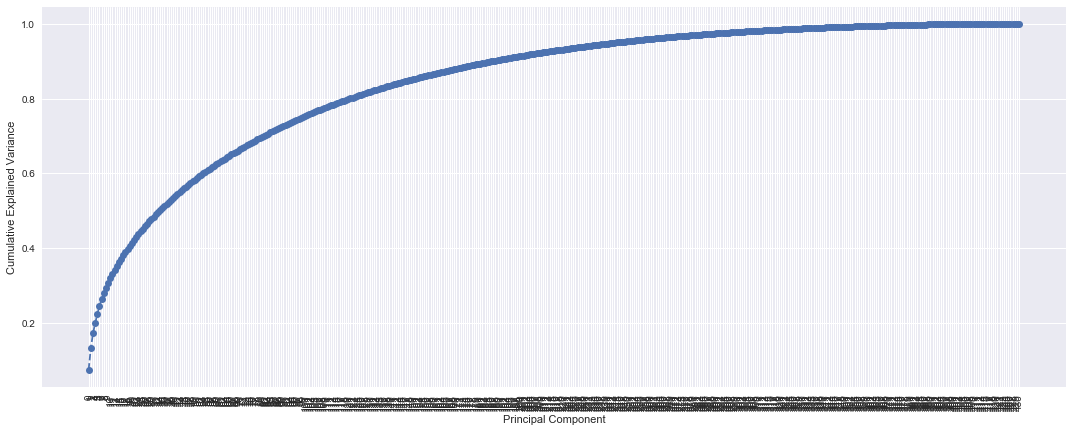

In [103]:
v=plt_pca(azdias)

With 187 components it can be explained 90 % of the variance. Thats a lot of feature less

In [104]:
from utils import display_component

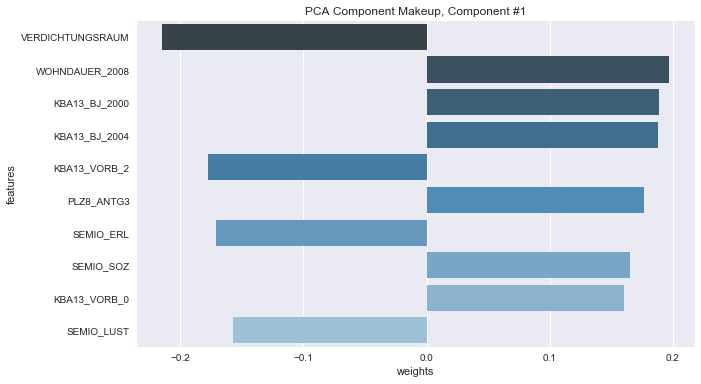

In [105]:
# display makeup of first component
num=1
display_component(v, azdias.columns.values, N_COMPONENTS=187,component_num=num, n_weights=10)

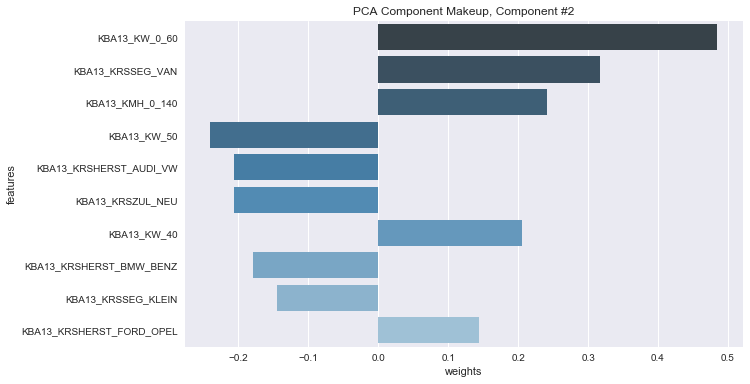

In [106]:
# display makeup of first component
num=2
display_component(v, azdias.columns.values, N_COMPONENTS=187,component_num=num, n_weights=10)

Principal components Analysis is a Linear combinations of other features and sometimes it might be quiet a little hard to understand them, but the above graphs can help get an idea...  , we can see that the first component the feautures **VERDICHTUNGSRAUM** and **WOHNDAUER_2008** are the predominant features. Sadly **VERDICHTUNGSRAUM** we don't have this variable in the description file, it translate COMPRESSION ROOM. But WOHNDAUER_2008 is length of residence

In [108]:
# specify top n
top_n = 186
pca = PCA(n_components=top_n)
azdias_PCA=pca.fit_transform(azdias.copy())
azdias_PCA=pd.DataFrame(azdias_PCA, index=azdias.index)
azdias_PCA.columns = ['P_'+str(i) for i in range(1,top_n+1)]    
azdias_PCA.head()

,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,P_11,P_12,P_13,P_14,P_15,P_16,P_17,P_18,P_19,P_20,P_21,P_22,P_23,P_24,P_25,P_26,P_27,P_28,P_29,P_30,P_31,P_32,P_33,P_34,P_35,P_36,P_37,P_38,P_39,P_40,P_41,P_42,P_43,P_44,P_45,P_46,P_47,P_48,P_49,P_50,P_51,P_52,P_53,P_54,P_55,P_56,P_57,P_58,P_59,P_60,P_61,P_62,P_63,P_64,P_65,P_66,P_67,P_68,P_69,P_70,P_71,P_72,P_73,P_74,P_75,P_76,P_77,P_78,P_79,P_80,P_81,P_82,P_83,P_84,P_85,P_86,P_87,P_88,P_89,P_90,P_91,P_92,P_93,P_94,P_95,P_96,P_97,P_98,P_99,P_100,P_101,P_102,P_103,P_104,P_105,P_106,P_107,P_108,P_109,P_110,P_111,P_112,P_113,P_114,P_115,P_116,P_117,P_118,P_119,P_120,P_121,P_122,P_123,P_124,P_125,P_126,P_127,P_128,P_129,P_130,P_131,P_132,P_133,P_134,P_135,P_136,P_137,P_138,P_139,P_140,P_141,P_142,P_143,P_144,P_145,P_146,P_147,P_148,P_149,P_150,P_151,P_152,P_153,P_154,P_155,P_156,P_157,P_158,P_159,P_160,P_161,P_162,P_163,P_164,P_165,P_166,P_167,P_168,P_169,P_170,P_171,P_172,P_173,P_174,P_175,P_176,P_177,P_178,P_179,P_180,P_181,P_182,P_183,P_184,P_185,P_186
LNR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
910220,-2.195835,-11.367185,-6.727723,-5.295713,4.739867,-2.921129,-0.169934,0.214378,1.039811,6.800000,-1.164135,2.299360,3.761142,1.700685,2.134627,3.146356,0.720589,-0.579113,1.508389,-1.101663,-1.085998,2.302071,-0.357018,-3.730295,1.676544,-1.037268,-0.828943,0.960866,0.385816,0.400943,-1.194249,1.599574,-0.507823,-0.392180,-0.494447,-1.903456,-3.645912,1.425322,2.042908,-1.676833,-0.664149,1.365529,2.633514,1.294298,1.486197,-1.748711,1.849131,-0.184067,-0.313526,-0.527210,0.225678,-0.610815,-3.060169,-1.770872,1.417321,1.156484,1.492692,3.750239,-0.873910,-0.997723,-1.108639,1.520154,-0.872159,0.890633,0.852646,0.130988,0.606377,0.361523,1.808955,-1.123184,-2.261018,0.593751,-0.668311,0.613823,1.202736,0.015473,-0.744299,-1.727971,1.414886,-1.474228,0.617307,1.000304,-0.713675,-0.419520,-0.687563,-0.974522,-3.456786,2.011295,1.515953,0.489463,-1.949527,0.964289,-0.306533,0.061802,0.525541,-0.527990,-0.070659,-1.228881,-0.833107,-0.106864,1.193961,0.390095,0.551575,-0.100661,0.107740,-0.280354,0.114233,-0.447747,0.422298,-1.048518,-1.123576,-0.243768,-1.259520,-1.408761,0.785603,2.130051,0.035287,-1.241229,0.232186,0.465075,-0.715546,-0.176024,-0.495829,1.184519,1.774463,-1.235714,-0.377257,0.772815,-1.021104,-0.152312,-0.173095,-0.658923,-0.497431,-0.513307,-0.238782,-0.495134,0.172621,-0.666858,-1.185944,-0.056444,0.864503,-0.915652,-0.739630,0.902517,0.200155,1.554803,0.426144,-0.009714,-0.128335,0.362909,0.314436,0.071112,-1.592334,0.937215,-0.751829,-0.667471,-0.389745,-0.417288,0.774034,-0.077177,0.265398,-0.165219,0.301841,-0.091742,-0.314236,0.115124,-1.698496,0.698228,-0.566718,0.297324,0.201523,0.232367,0.225022,0.263659,0.221255,0.679308,0.606405,-0.986386,0.053644,0.340088,0.175219,-0.106507,0.183516,0.472300,0.282756,0.315267
910225,-2.915207,-4.641132,0.272139,-5.385125,4.292449,-4.516358,-5.717122,2.330243,-0.951459,-2.015241,2.199454,-3.047420,-2.826737,1.715748,-1.758428,-0.459014,0.282135,-0.371579,1.211807,-1.183375,-1.584693,-1.734727,1.583854,0.892418,-0.533225,-2.035641,1.435170,2.161708,-0.207290,0.007982,-1.538051,-0.555816,-2.856480,-2.190010,-0.424208,0.444465,-2.468811,0.303864,0.441639,-0.108248,-1.608648,-2.971617,-0.224070,-2.560865,-0.615556,-0.656569,-1.582330,-1.814805,-0.455668,0.614353,0.065247,-1.024488,-0.091793,1.983332,0.199084,-0.670762,-0.603800,-2.033086,0.297449,0.418624,-1.079072,-0.971776,-0.012445,-0.340148,-1.602653,0.299783,-0.229534,-0.018887,1.121618,-0.187315,-1.890046,0.550777,-1.249883,-1.474135,0.062738,-0.290971,0.094673,0.586316,1.592816,-0.075427,-0.182833,-0.628573,0.710264,0.177039,-0.671168,0.530998,0.864495,-0.197118,0.180481,-0.711607,1.534761,0.066580,0.188295,-1.155104,0.706323,2.022485,0.737329,-0.306626,0.588196,-1.121292,0.378156,0.003913,0.450792,0.837631,-0.433899,0.515046,1.38

## Clustering

Elbow method was used to identify an ideal number of clusters for k-means clustering on the PCA-transformed data. Average of sum of squared errors (SSE) within-cluster distances was plotted against number of clusters from 3 to 20. 

In [109]:
import datetime
import time

In [110]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from utils import elbow_method_computing

In [111]:
def silhouette_kmeans(df,clusters,step):
    for K in range(2,clusters,step):
        cluster_kmeans = KMeans(n_clusters=K, random_state=np.random.randint(42), n_jobs=-1)
        cluster_kmeans.fit(df)
        y_kmeans = cluster_kmeans.predict(df)
        centers_=cluster_kmeans.cluster_centers_
        silhouette_avg = silhouette_score(df, y_kmeans,sample_size=int(df.shape[0]/10))
        print('Number of K = {}, The average silhouette_score is :{}'.format(K,silhouette_avg))

In [102]:
res_clusters=elbow_method_computing(azdias_PCA,3,30, 2)

3 Time Training :1.30 minutes 
5 Time Training :1.98 minutes 
7 Time Training :2.79 minutes 
9 Time Training :3.98 minutes 
11 Time Training :4.06 minutes 
13 Time Training :4.00 minutes 
15 Time Training :4.83 minutes 
17 Time Training :5.53 minutes 
19 Time Training :6.40 minutes 
21 Time Training :7.00 minutes 
23 Time Training :7.93 minutes 
25 Time Training :8.22 minutes 
27 Time Training :9.41 minutes 
29 Time Training :10.11 minutes 


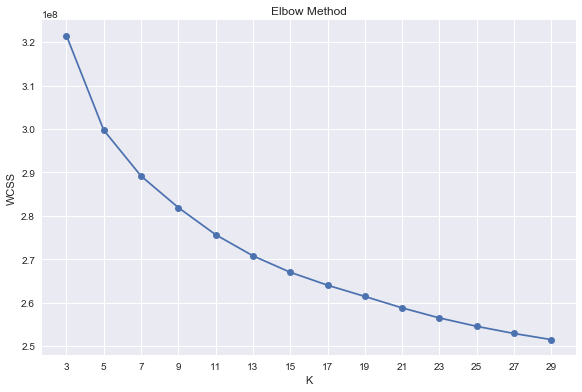

In [103]:
plt.plot(res_clusters['k'],res_clusters['wcss'],marker='o');
plt.xticks(res_clusters['k']);
plt.xlabel('K');
plt.tight_layout()
plt.ylabel('WCSS');
plt.title('Elbow Method');

In [104]:
silhouette_kmeans(azdias_PCA,20,2)

Number of K = 2, The average silhouette_score is :0.19661945025237915
Number of K = 4, The average silhouette_score is :0.0776937809485074
Number of K = 6, The average silhouette_score is :0.0589298149347525
Number of K = 8, The average silhouette_score is :0.0503429444555584
Number of K = 10, The average silhouette_score is :0.04771272827021607
Number of K = 12, The average silhouette_score is :0.04753635439226313
Number of K = 14, The average silhouette_score is :0.04357539139195143
Number of K = 16, The average silhouette_score is :0.041600926961121915
Number of K = 18, The average silhouette_score is :0.040270786052151814


Looking at the plot above, we can notice that the score keeps decreasing and there is a visible elbow  after 5 clusters,  I will choose **8** clusters to do KMeans clustering.

The silhouette_score is not the best, ideally a good score is above 0.5, but we are using a sample since this process takes a lot of time, so don't panic. 

In [112]:
#k-means model   
kmeans = KMeans(n_clusters=8, random_state=42, n_jobs=-1)
labels_azdias = kmeans.fit_predict(azdias_PCA)

In [150]:
import matplotlib.cm as cm

In [151]:
def plot_clusters(df,n_clusters,centroids,labels):
    #import matplotlib.pyplot as plt
    plt.figure(figsize=[16,5])
    #Plot showing the actual clusters formed
    colors = cm.nipy_spectral(labels.astype(float) / n_clusters)
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')
    # Labeling the clusters
    centers = centroids
    # Draw white circles at cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')
        
    plt.title("The visualization of the clustered data.")
    plt.xlabel("Feature space for the 1st feature")
    plt.ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("Analysis for KMeans clustering "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')    

it look kind of nice, but still we can see that some cluster might be overlaping,
so this project still needs time, maybe with some more data preprations. 

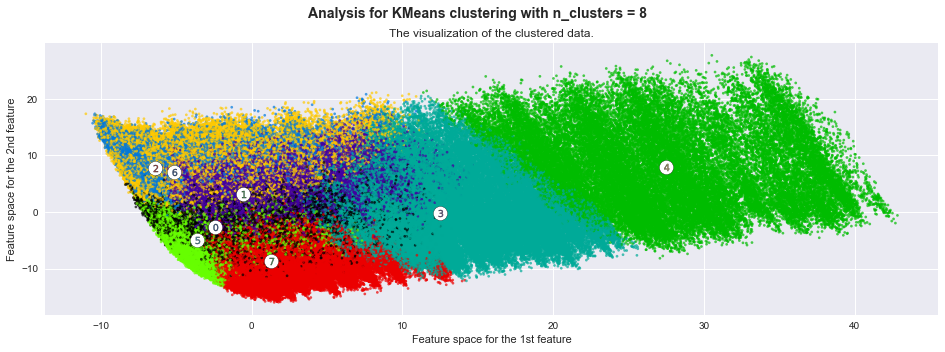

In [152]:
y_assigment=plot_clusters(azdias_PCA,8,kmeans.cluster_centers_,labels_azdias)

In [109]:
from mpl_toolkits import mplot3d

<Figure size 576x396 with 0 Axes>

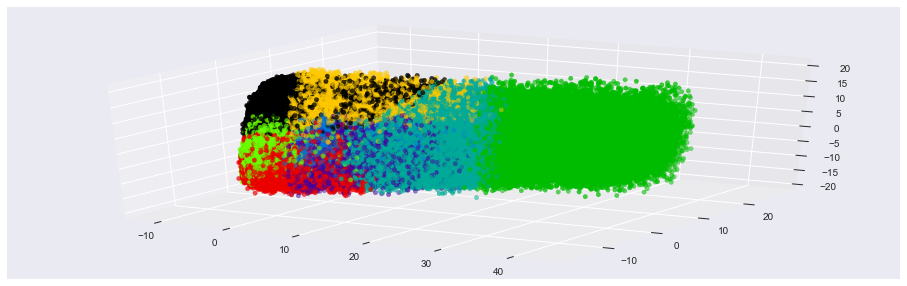

In [153]:
fig = plt.figure()
plt.figure(figsize=[16,5])
ax = plt.axes(projection='3d')
colors = cm.nipy_spectral(labels_azdias.astype(float) / 8)
ax.scatter3D(azdias_PCA.iloc[:, 0], azdias_PCA.iloc[:, 1],azdias_PCA.iloc[:, 2], c=colors);

In [113]:
print(pd.Series(labels_azdias).value_counts())

7    139686
4    116346
6    108531
5    106380
0     94194
1     72924
2     63550
3     35677
dtype: int64


In [114]:
pd.Series(labels_azdias).value_counts(normalize=True)

7    0.189459
4    0.157803
6    0.147203
5    0.144286
0    0.127757
1    0.098908
2    0.086194
3    0.048390
dtype: float64

In [115]:
df_prediction_azdias = pd.DataFrame(labels_azdias, columns = ['Cluster'])

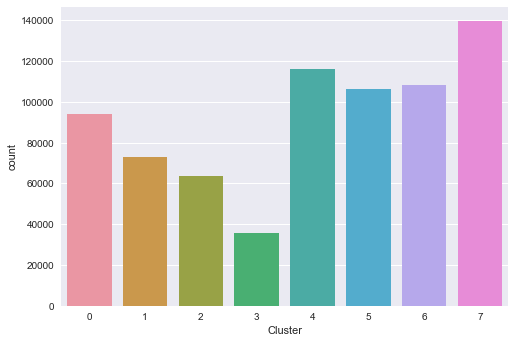

In [116]:
sns.countplot(x="Cluster", data=df_prediction_azdias);

### Save Model

In [117]:
# save the model to disk
import pickle

In [118]:
filename = 'clustering_model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [119]:
filename = 'clustering_model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

### PIPELINE

TODO !

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [121]:
top_n = 186
nclusters = 8

In [ ]:
# preprocessing pipelines for both numeric and categorical data.
numeric_features = list(filter(lambda x:x in azdias.columns.tolist(),numeric_features))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = columns_to_OHE

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',drop='first'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('PCA',PCA(n_components=top_n))
                      ('Kmeans', KMeans(n_clusters=nclusters, random_state=42, n_jobs=-1))])

In [234]:
#cluster_pipeline.fit(azdias_clean)

## Load Customer Data

In [122]:
customers = pd.read_csv('data/Udacity_CUSTOMERS_052018.csv',sep=';')

## Clean Customers

In [123]:
clean_customers = clean_data(customers)

In [124]:
clean_customers=pd.get_dummies(clean_customers,columns=columns_to_OHE)

In [125]:
# Correct de columns names
clean_customers.columns = [col.split('.')[0] for col in clean_customers.columns ]    

In [126]:
#  Check for missing column in `clean_customers`
miss_attribute = list(azdias.columns[~azdias.columns.isin(clean_customers.columns.tolist())])
miss_attribute

['GEBAEUDETYP_5']

In [127]:
#Default value  is  0
clean_customers['GEBAEUDETYP_5'] = 0
clean_customers['GEBAEUDETYP_5'] = clean_customers['GEBAEUDETYP_5'].astype('uint8')

In [128]:
clean_customers=clean_customers[azdias.columns]

In [129]:
clean_customers.shape

(191652, 432)

## Predict

In [130]:
clean_customers[numeric_features_azdias] = Standard_scaler.transform(clean_customers[numeric_features_azdias])
new_income_customers_PCA    = pca.transform(clean_customers)
labels_predict              = kmeans.predict(new_income_customers_PCA)

In [131]:
clean_customers['cluster'] = labels_predict


clean_customers['cluster'].value_counts()

5    112852
4     34159
0     13815
2     10340
3      9314
1      6915
7      2934
6      1323
Name: cluster, dtype: int64

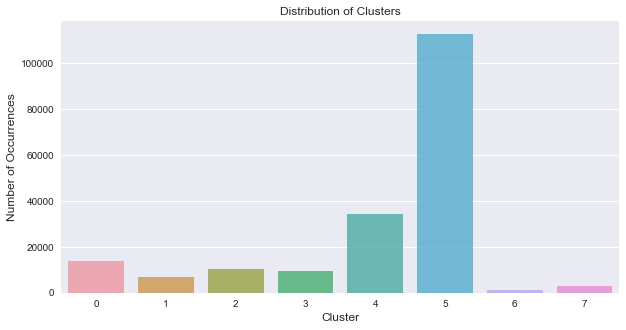

In [132]:
count  = clean_customers['cluster'].value_counts()
count  = count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Distribution of Clusters')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.show()

In [133]:
df_compare=pd.concat([pd.Series(labels_azdias).value_counts(), clean_customers['cluster'].value_counts()], axis=1)

In [134]:
df_compare.reset_index(inplace=True)
df_compare.columns =['Cluster','Azdias','Mail-Company']

In [135]:
df_compare.sort_values('Mail-Company',ascending=False)

,Cluster,Azdias,Mail-Company
5,5,106380,112852
4,4,116346,34159
0,0,94194,13815
2,2,63550,10340
3,3,35677,9314
1,1,72924,6915
7,7,139686,2934
6,6,108531,1323


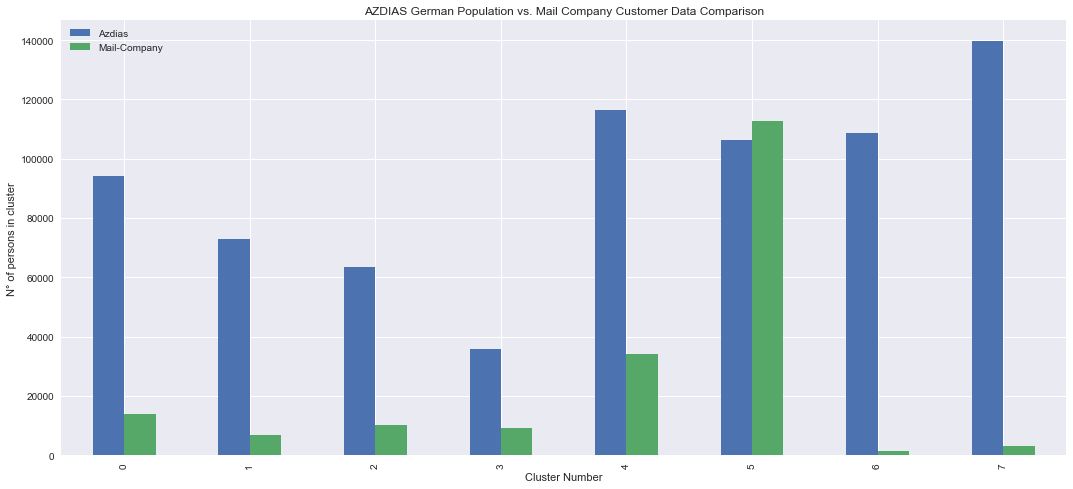

In [136]:
# Compare visually
df_compare.plot(x='Cluster', y=['Azdias', 'Mail-Company'], kind='bar', figsize=(18, 8))
plt.title('AZDIAS German Population vs. Mail Company Customer Data Comparison')
plt.xlabel('Cluster Number')
plt.ylabel('N° of persons in cluster')
plt.show()

**Discussion**

 58 % percent of the customers' data fit in the cluster with label 5. 
 
 The company can take this population as future customers in Germany, since they share similarities. 
 
 With the azdias file we can see that 14 % of the clients are located in that cluster. Those 106380	 are the targeted clusters. 

In [138]:
df_compare['Mail-Company'].sum()

191652

In [139]:
azdias.shape

(737288, 432)

In [140]:
azdias_PCA.shape

(737288, 186)

In [143]:
azdias['cluster']=labels_azdias

In [171]:
azdias_original = pd.read_csv('data/Udacity_AZDIAS_052018.csv', sep=';')
azdias_original.set_index('LNR',inplace=True)

In [172]:
azdias_final=pd.merge(azdias[azdias['cluster']==5][['cluster']],
                      azdias_original,
                      right_index=True, left_index=True,how='left')

In [178]:
azdias_final=replace_NaN_data(azdias_final)

### Lets Analyze some of the features in cluster 5

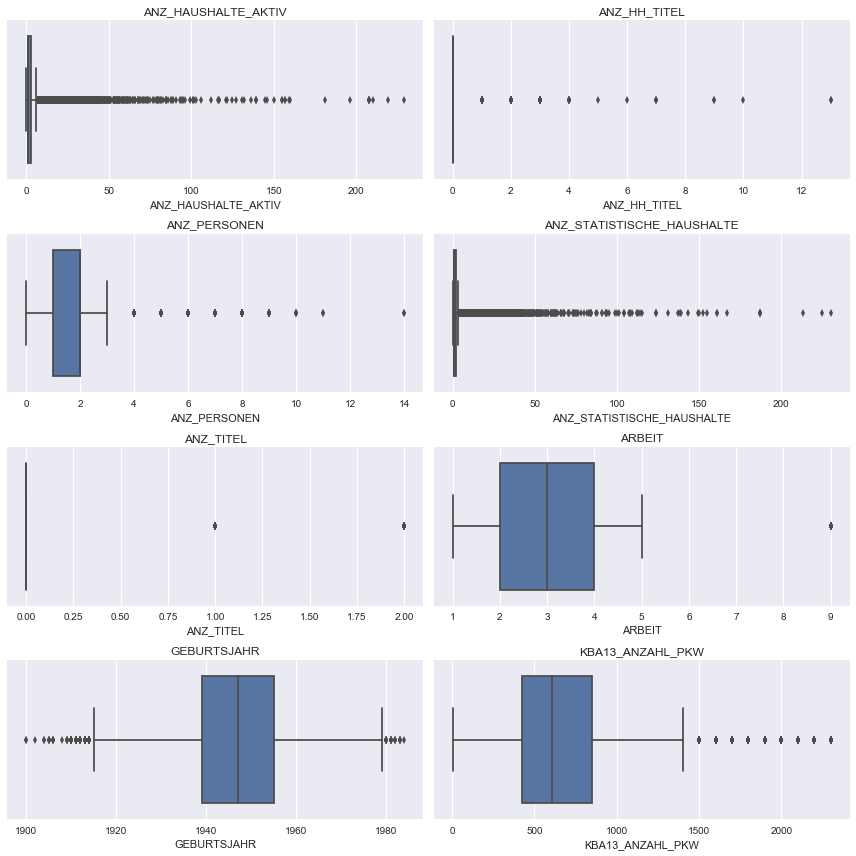

In [179]:
numeric = list(filter(lambda x:x in azdias_final.columns.tolist(),numeric_features))
nr_cols = 2
nr_rows = len(numeric)//nr_cols
li_cat_feats = numeric
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*6,nr_rows*3))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], data=azdias_final, ax = axs[r][c]).set_title(li_cat_feats[i])
plt.tight_layout()
plt.show()

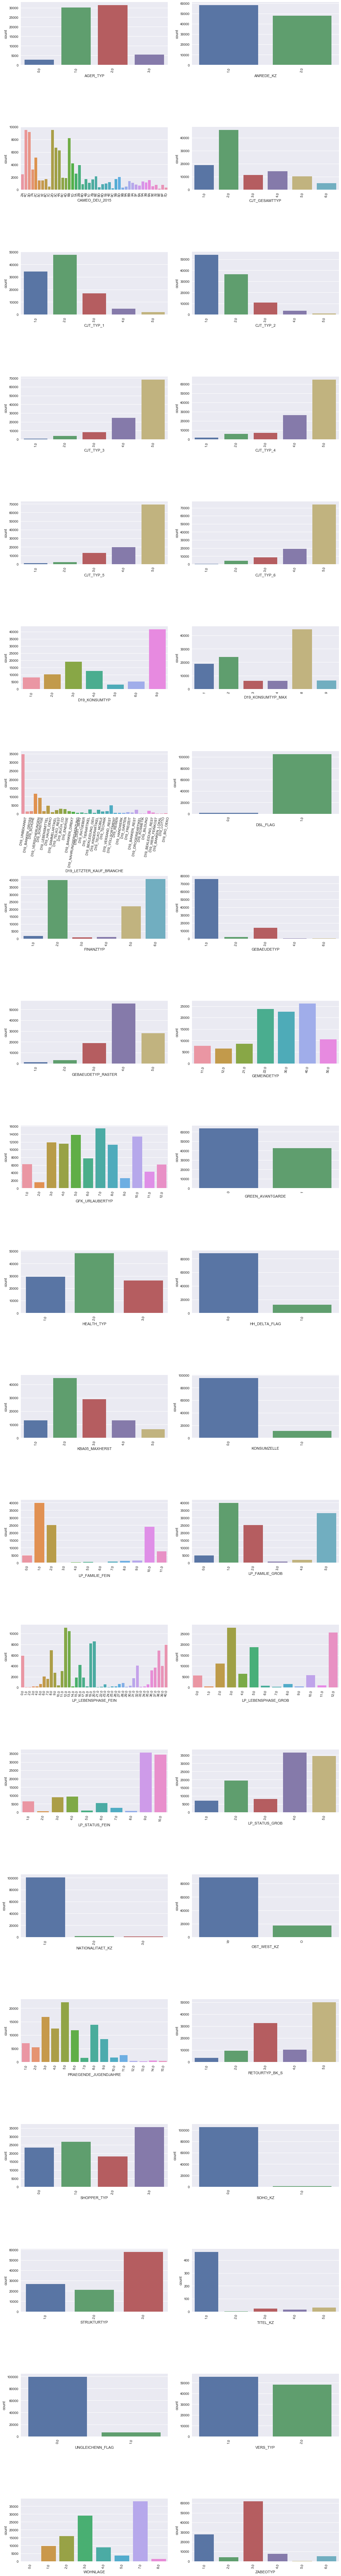

In [180]:
categories = list(filter(lambda x:x in azdias_final.columns.tolist(),columns_OHE))
nr_cols = 2
nr_rows = len(categories)//nr_cols
li_cat_feats = categories
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*7,nr_rows*5))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.countplot(x=li_cat_feats[i], data=azdias_final, ax = axs[r][c])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

From the above graphs we can start to form a picture of the target customer.

Characteristics: 
    
    - Single
    - Top earners
    - Passive elderly - Higher age. 
    - Retired. 
    - Houseowrners from rural neighbourhood or residental building
    - Consumption type : inactive
    - Financialy money savers or unremarkable
    - Typification of energy consumers : green | smart
    - Advertising- and Consumptiontraditionalist
    - TOP CAMEO International Customer Classifications : String Trimmer, Fine Management, Petty Bourgeois, Secure Retirement


# Considerations

There are a lot of things I still one to try to improve the project. 

Something to try out, could be to fill missing values with -1 instead of the mean or mode. 
This could help to create a cluster with missing values and keeping other clusters without any miss leading information based on imputation. 

There are other clusterings techniques to try like : 

- Gaussian Mixture Models
- Spectral Clustering
- DBSCAN

As well other Dimensional Reduction Techniques like:

- NMF
- t-sne

# References

1. [Average Advertisin Costs](https://www.lyfemarketing.com/blog/average-advertising-costs/)
2. [Silhoutte Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
3. [Elbow Method Heuristic](https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/c71ea970-0f3c-4973-8d3a-b09a7a6553c1.xhtml)
4. [ROC Curve AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
5. [K-MEANS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)